**Import Necessary Libraries **

In [2]:
import os
import PyPDF2
import pickle
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt
from tensorflow.keras.models import load_model

In [84]:
# Function to read PDF files

def read_pdfs_from_folder(folder_path):
    texts = []
    labels = []

    for label in os.listdir(folder_path):
        label_folder = os.path.join(folder_path, label)
        if os.path.isdir(label_folder):
            for pdf_file in os.listdir(label_folder):
                if pdf_file.endswith('.pdf'):
                    pdf_path = os.path.join(label_folder, pdf_file)
                    with open(pdf_path, 'rb') as file:
                        reader = PyPDF2.PdfReader(file)
                        text = ''
                        for page in reader.pages:
                            text += page.extract_text() + ' '
                        texts.append(text)
                        labels.append(1 if label == 'Publishable' else 0)
    return texts, labels

In [85]:
# Load dataset
folder_path = '/content/drive/MyDrive/RNN/Reference'
texts, labels = read_pdfs_from_folder(folder_path)

In [86]:
# Preprocess the data (Vectorizering)
vectorizer = CountVectorizer(max_features=5000)
X = vectorizer.fit_transform(texts).toarray()
y = np.array(labels)

In [87]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Building the model**

In [88]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [89]:
# Summary of the architecture
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_28 (Dense)                     │ (None, 128)                 │         640,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_21 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 648,514 (2.47 MB)

 Trainable params: 648,514 (2.47 MB)

 Non-trainable params: 0 (0.00 B)

In [90]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [91]:
# Train the model
history = model.fit(X_train, y_train, epochs=30, batch_size=32,verbose=1, validation_data=(X_test, y_test))

Epoch 1/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 6.2058 - val_accuracy: 0.4000 - val_loss: 5.4917
Epoch 2/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.7500 - loss: 1.1810 - val_accuracy: 0.4000 - val_loss: 4.0385
Epoch 3/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.6875 - loss: 5.8377 - val_accuracy: 0.6000 - val_loss: 1.8212
Epoch 4/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.5625 - loss: 5.4012 - val_accuracy: 0.8000 - val_loss: 0.2641
Epoch 5/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.6875 - loss: 1.7425 - val_accuracy: 0.8000 - val_loss: 0.6273
Epoch 6/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.8125 - loss: 0.8185 - val_accuracy: 0.8000 - val_loss: 1.0574
Epoch 7/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.6250 - loss: 6.9155 - val_accuracy: 0.8000 - val_loss: 1.2645
Epoch 8/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.8750 - loss: 0.8060 - val_accuracy: 0.8000 - val_loss: 1.3454
Ep

In [92]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 1.0000 - loss: 0.0011
Test Accuracy: 1.00


In [93]:
# Evaluate Model
y_pred_probs = model.predict(X_test)  # Get predicted probabilities
y_pred_classes = np.argmax(y_pred_probs, axis=1)  # Get predicted class labels (0 or 1)
print(classification_report(y_test, y_pred_classes))  # Use predicted class labels for classification_report

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         2

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



**Plotting Accuracy And Loss Graphs**

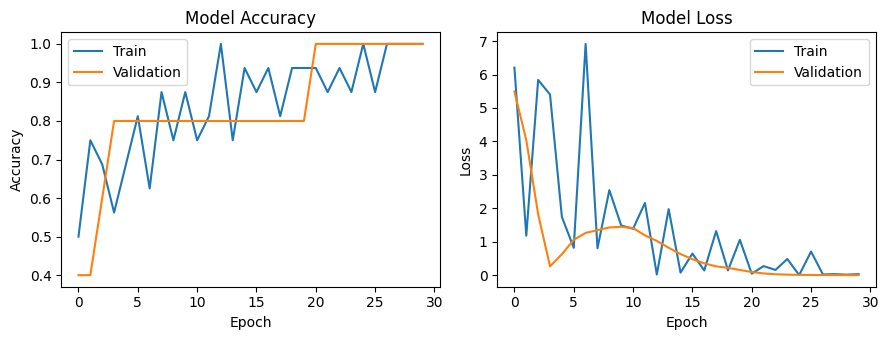

In [94]:
fig, axes = plt.subplots(1, 2, figsize=(9, 3.5))

# Plot accuracy
axes[0].plot(history.history['accuracy'])
axes[0].plot(history.history['val_accuracy'])
axes[0].set_title('Model Accuracy')
axes[0].set_ylabel('Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].legend(['Train', 'Validation'])

# Plot loss
axes[1].plot(history.history['loss'])
axes[1].plot(history.history['val_loss'])
axes[1].set_title('Model Loss')
axes[1].set_ylabel('Loss')
axes[1].set_xlabel('Epoch')
axes[1].legend(['Train', 'Validation'])

plt.tight_layout()
plt.show()

**Saving model in h5 & pickel file for future excitation**

In [97]:
model.save('Pdf_Classification_0.h5')

In [98]:
import pickle
with open('vectorizer.pickle', 'wb') as f:
    pickle.dump(vectorizer, f)

**Testing a single pdf locally**

In [103]:
def predict_pdf_class(pdf_path):
    with open(pdf_path, 'rb') as file:
        reader = PyPDF2.PdfReader(file)
        text = ''
        for page in reader.pages:
            text += page.extract_text() + ' '

    input_data = vectorizer.transform([text]).toarray()
    prediction = model.predict(input_data)[0]
    class_label = 'Publishable' if prediction[1] > prediction[0] else 'Non-Publishable'

    return class_label

In [104]:
pdf_file_path = '/content/drive/MyDrive/RNN/Reference/Publishable/R015.pdf'
result = predict_pdf_class(pdf_file_path)
print(f"The PDF file is classified as: {result}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
The PDF file is classified as: Publishable


  **Predict the class of given PDF file**

In [4]:
# Load the trained model and vectorizer
model = load_model('Pdf_Classification_0.h5')
with open('vectorizer.pickle', 'rb') as f:
    vectorizer = pickle.load(f)

C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator CountVectorizer from version 1.6.0 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [5]:
# Function to predict the class of a PDF file
def predict_pdf_class(pdf_path):
    with open(pdf_path, 'rb') as file:
        reader = PyPDF2.PdfReader(file)
        text = ''
        for page in reader.pages:
            text += page.extract_text() + ' '

    input_data = vectorizer.transform([text]).toarray()
    prediction = model.predict(input_data)[0]
    class_label = 'Publishable' if prediction[1] > prediction[0] else 'Non-Publishable'

    return class_label


In [9]:
# Folder containing test PDF files
folder_path = r"C:\Users\HP\Music\New folder"

In [10]:
# Process PDF files and store results
results = []
for filename in os.listdir(folder_path):
    if filename.endswith('.pdf'):
        pdf_path = os.path.join(folder_path, filename)
        class_label = predict_pdf_class(pdf_path)
        results.append([filename, class_label])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step


In [11]:
# Create a Pandas DataFrame and save to CSV
df = pd.DataFrame(results, columns=['Filename', 'Class'])
df.to_csv('pdf_classification_results.csv', index=False)

print("Classification results saved to pdf_classification_results.csv")

Classification results saved to pdf_classification_results.csv


In [13]:
df = pd.read_csv('pdf_classification_results.csv')
df.head()

,Filename,Class
0,untitled.pdf,Publishable
